In [42]:
import pandas as pd
import os

script_dir = os.getcwd()
dataset_path = os.path.join(script_dir, '..', 'depression_data.csv')
data = pd.read_csv(dataset_path)

data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


EDA Steps

Step 1: Feature engineering, Dropping the 'Name' column to protect users privacy and because it is an unneccesary feature that is causally
impotent and cannot effect our response variable. 

In [43]:
data.drop(columns=['Name'], inplace=True)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


Step 2 & 3 : Displaying general characteristics of the quantititative features: 'Age', 'Number of Children' and 'Income'

In [44]:
summaryAge = data['Age'].describe()
print(summaryAge)

count    413768.000000
mean         49.000713
std          18.158759
min          18.000000
25%          33.000000
50%          49.000000
75%          65.000000
max          80.000000
Name: Age, dtype: float64


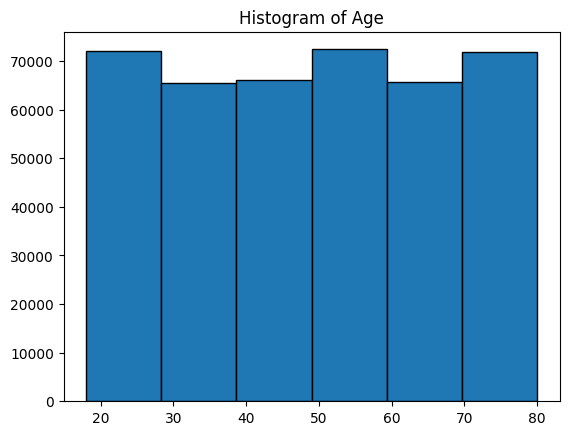

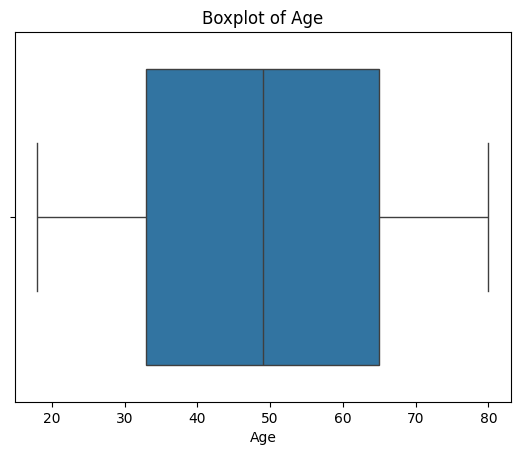

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.hist(data['Age'], bins=6, edgecolor='black')
plt.title('Histogram of Age')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

In [46]:
summaryNumChildren = data['Number of Children'].describe()
print(summaryNumChildren)

count    413768.000000
mean          1.298972
std           1.237054
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: Number of Children, dtype: float64


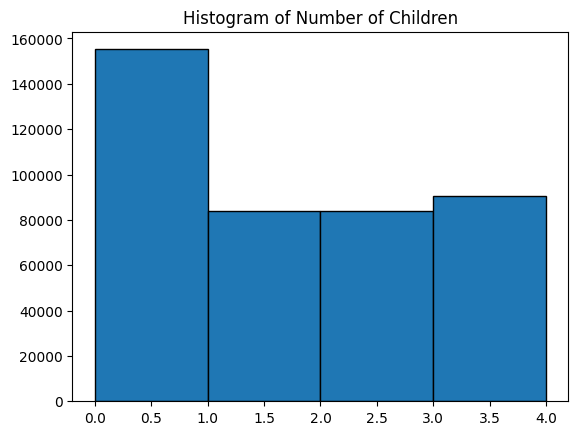

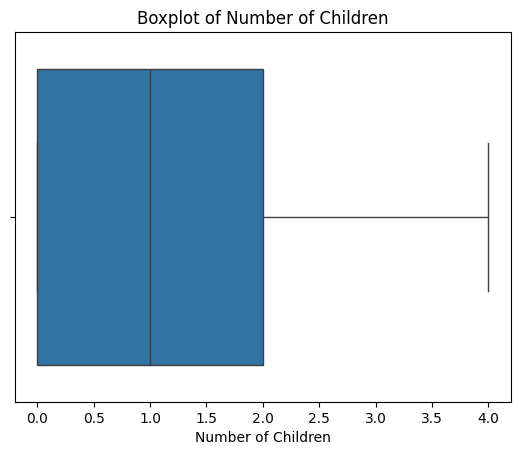

In [47]:
# Histogram
plt.hist(data['Number of Children'], bins=4, edgecolor='black')
plt.title('Histogram of Number of Children')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Number of Children'])
plt.title('Boxplot of Number of Children')
plt.show()

In [48]:
summaryIncome = data['Income'].describe()
print(summaryIncome)

count    413768.000000
mean      50661.707971
std       40624.100565
min           0.410000
25%       21001.030000
50%       37520.135000
75%       76616.300000
max      209995.220000
Name: Income, dtype: float64


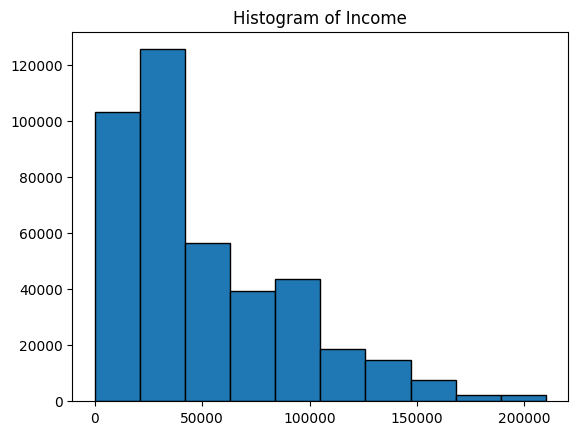

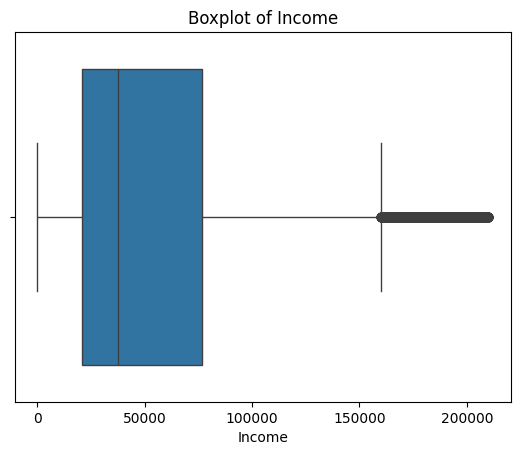

In [49]:
# Histogram
plt.hist(data['Income'], bins=10, edgecolor='black')
plt.title('Histogram of Income')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Income'])
plt.title('Boxplot of Income')
plt.show()

Step 4: Investigating and visualizing relationship between categorical features and and depression

A) Investigating the breakdown of 'Marital Status' amongst the depressed sample population

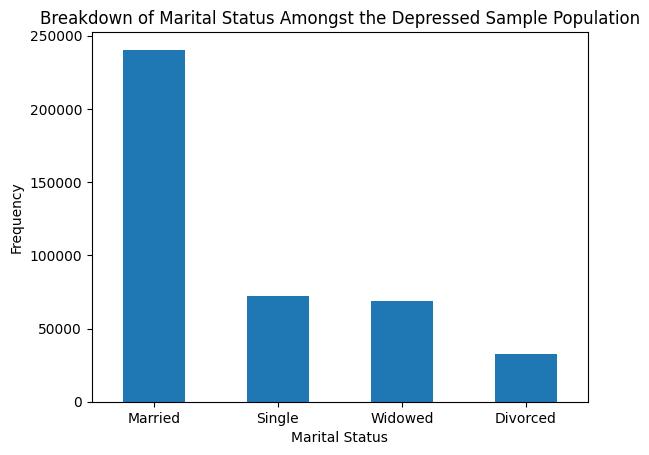

In [50]:
maritalStatusCounts = data['Marital Status'].value_counts()
maritalStatusCounts.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Breakdown of Marital Status Amongst the Depressed Sample Population')
plt.xticks(rotation=0)
plt.show()

The bar graph clearly shows that most of the depressed individuals are married, this suggests an increased association between being married and being depressed. This sets us up nicely for a linear regression analysis down the line to predict how being married can impact depression.

Interestingly, divorced individuals have the lowest frequency amongst our depressed sample population, this might suggest that perhaps being unburdened by a large stress inducing factor (unhealthy relationships) can be associated with positive mental health. We could further investigate the hypothesis that being unburdened by a large stress inducing factor, be it an unhealthy relationship or not worrying about finances, can lead to better mental health through methods such as k-means clustering

B) Investigating the relationship between having 'Chronic Medical Conditions' and depression

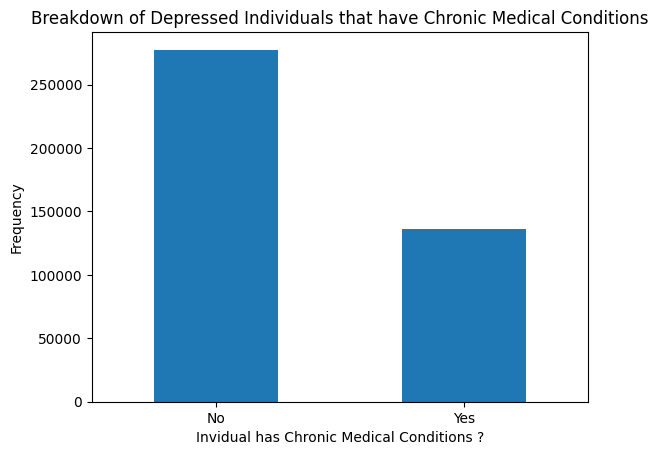

In [51]:
medCount = data['Chronic Medical Conditions'].value_counts()
medCount.plot(kind='bar')
plt.xlabel('Invidual has Chronic Medical Conditions ?')
plt.ylabel('Frequency')
plt.title('Breakdown of Depressed Individuals that have Chronic Medical Conditions')
plt.xticks(rotation=0)
plt.show()

This graph is interesting becuase 'Chronic Medical Conditions' could be causally affected by other lifestlye features in the dataset like 'Smoking Status', 'Physical Activity Level', 'Dietary Habits' and 'Alcohol Consumption', therefore if there was a high frequency of Chronically Ill individuals who are depressed, it could suggest an association between depression and being chronically ill. This graph does not show that, it instead suggests that being chronically ill is not strongly associated with depression, implying that given limited resources and time, investigating the relationship between these lifestlye factors and their effect on health and in turn the potential to reduce probability of developing depression might not yield a significant result.

Step 5 Multivariate Analysis : 

A) Generating a heatmap to investigate correlation between the features

Data PreProcessing: Encoding all the ordinal categorical variables. 

Mapping and encoding unique education levels:

In [52]:
eduLevels = data["Education Level"].unique()
print(eduLevels)

["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']


In [53]:
eduMap = {
    'High School': 0,
    'Associate Degree': 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    'PhD': 4
}
data["Education Level"] = data["Education Level"].map(eduMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,0,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


Mapping and Encoding Activity Levels: 

In [54]:
actLevels = data["Physical Activity Level"].unique()
print(actLevels)

['Active' 'Sedentary' 'Moderate']


In [55]:
actMap = {
    'Sedentary': 0,
    'Moderate': 1,
    'Active': 2
}

data["Physical Activity Level"] = data["Physical Activity Level"].map(actMap)
data.head()


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,2,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,0,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,0,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,1,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,0,0,Non-smoker,0,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


Mapping and Encoding Alcohol Consmuption, Dietary Habits and Sleep Patterns:

In [56]:
sleepLevels = data["Sleep Patterns"].unique()
alcLevels = data["Alcohol Consumption"].unique()
dietLevels = data["Dietary Habits"].unique()

print(sleepLevels)
print(alcLevels)
print(dietLevels)

['Fair' 'Good' 'Poor']
['Moderate' 'High' 'Low']
['Moderate' 'Unhealthy' 'Healthy']


In [57]:
sleepMap = {
    'Fair': 1,
    'Good': 2,
    'Poor': 0
}

alcMap = {
    'Moderate':1,
    'High':2,
    'Low': 0
}

dietMap = {
    'Moderate':1,
    'Unhealthy': 0,
    'Healthy': 2
}

data['Sleep Patterns'] = data['Sleep Patterns'].map(sleepMap)
data['Alcohol Consumption'] = data['Alcohol Consumption'].map(alcMap)
data['Dietary Habits'] = data['Dietary Habits'].map(dietMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,2,Unemployed,26265.67,1,1,1,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,0,Employed,42710.36,2,0,1,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,0,Employed,125332.79,0,0,2,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,1,Unemployed,9992.78,1,1,0,No,No,No,No
4,18,Single,0,0,Non-smoker,0,Unemployed,8595.08,0,1,1,Yes,No,Yes,Yes


Encoding of smoking status:

In [58]:
smokingLevels = data['Smoking Status'].unique()
print(smokingLevels)

['Non-smoker' 'Former' 'Current']


In [59]:
smokeMap = {
    'Non-smoker': 2,
    'Former': 1,
    'Current': 0
}
data['Smoking Status'] = data['Smoking Status'].map(smokeMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,Unemployed,26265.67,1,1,1,Yes,No,Yes,Yes
1,55,Married,0,1,2,0,Employed,42710.36,2,0,1,Yes,No,No,Yes
2,78,Widowed,3,1,2,0,Employed,125332.79,0,0,2,No,No,Yes,No
3,58,Divorced,3,3,2,1,Unemployed,9992.78,1,1,0,No,No,No,No
4,18,Single,0,0,2,0,Unemployed,8595.08,0,1,1,Yes,No,Yes,Yes


In [60]:
yesMap = {
    'Yes': 1,
    'No': 0
}

data['History of Mental Illness'] = data['History of Mental Illness'].map(yesMap)
data['History of Substance Abuse'] = data['History of Substance Abuse'].map(yesMap)
data['Family History of Depression'] = data['Family History of Depression'].map(yesMap)
data['Chronic Medical Conditions'] = data['Chronic Medical Conditions'].map(yesMap)
data.head()


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,Unemployed,26265.67,1,1,1,1,0,1,1
1,55,Married,0,1,2,0,Employed,42710.36,2,0,1,1,0,0,1
2,78,Widowed,3,1,2,0,Employed,125332.79,0,0,2,0,0,1,0
3,58,Divorced,3,3,2,1,Unemployed,9992.78,1,1,0,0,0,0,0
4,18,Single,0,0,2,0,Unemployed,8595.08,0,1,1,1,0,1,1


Employment Encoding: 

In [61]:
empLevels = data['Employment Status'].unique()
print(empLevels)

['Unemployed' 'Employed']


In [62]:
empMap = {
    'Unemployed':0,
    'Employed': 1
}

data['Employment Status'] = data['Employment Status'].map(empMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,0,26265.67,1,1,1,1,0,1,1
1,55,Married,0,1,2,0,1,42710.36,2,0,1,1,0,0,1
2,78,Widowed,3,1,2,0,1,125332.79,0,0,2,0,0,1,0
3,58,Divorced,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,Single,0,0,2,0,0,8595.08,0,1,1,1,0,1,1
